<a href="https://colab.research.google.com/github/JanhaviGadre/AI-ML/blob/branch1/car_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import RocCurveDisplay, roc_curve, auc, classification_report, confusion_matrix

In [4]:
project_data = pd.read_csv("/content/car_data.csv")

In [5]:
project_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [7]:
project_data.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [6]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [8]:
project_data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [9]:
project_data.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

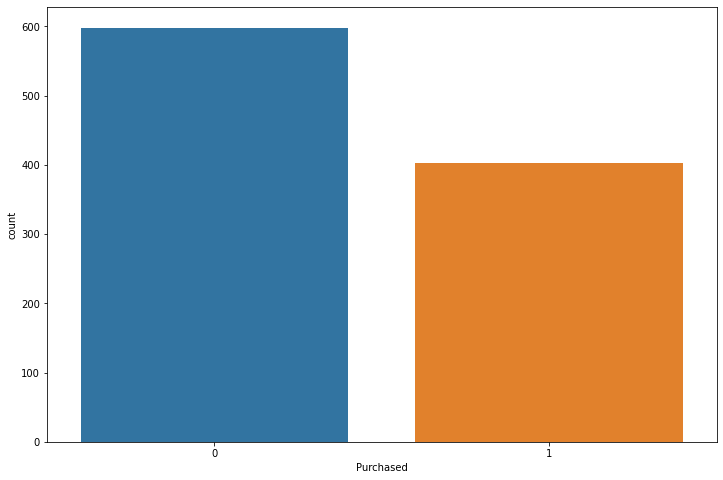

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='Purchased',data=project_data)
plt.show()

In [30]:
import plotly.express as px
fig = px.scatter(project_data, x='Age', y='AnnualSalary',color='Purchased',symbol='Gender')
fig.show()

In [31]:
fig = px.density_contour(project_data, x='Age', y='AnnualSalary')
fig.show()

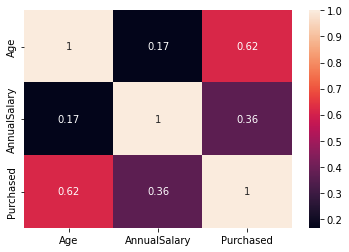

In [13]:
project_data = project_data.drop(columns=['User ID'], axis=1)
corr = project_data.corr()
sns.heatmap(corr, annot=True)

In [14]:
X_train=project_data.drop(columns="Purchased")
y_train=project_data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [15]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (700, 3)
Test dataset shape (700,)


In [16]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)

categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'AnnualSalary'], dtype='object')
Index(['Gender'], dtype='object')


In [18]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


In [19]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [20]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [21]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [22]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [23]:
algorithms = [('logistic regression', LogisticRegression()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))
    #prepare_classification_report(tup[0], model)
    
print(model_and_score)

{'logistic regression': '81.85714285714286%', 'KNN classifier': '92.42857142857143%', 'Random Forest calssifier': '99.71428571428571%', 'Adaboost classifier': '88.28571428571429%', 'Gradientboot classifier': '95.14285714285714%'}


In [24]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

logistic regression Report :
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       179
           1       0.78      0.72      0.75       121

    accuracy                           0.80       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.80      0.80       300



KNN classifier Report :
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.83      0.85      0.84       121

    accuracy                           0.87       300
   macro avg       0.86      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       179
           1       0.81      0.86      0.83       121

    accuracy                           0.86       300
   macro avg       0.85      0.86    

logistic regression


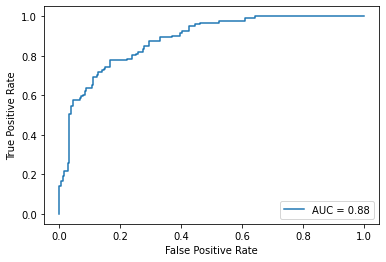

KNN classifier


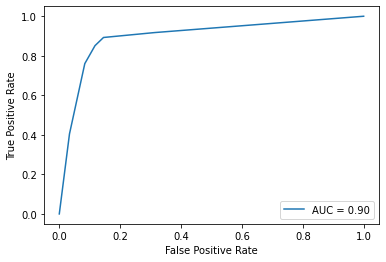

Random Forest calssifier


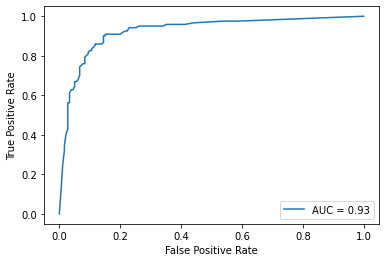

Adaboost classifier


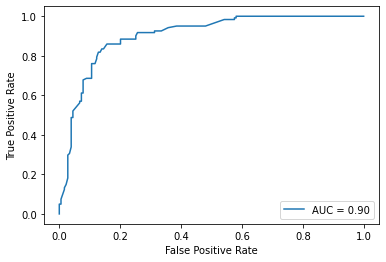

Gradientboot classifier


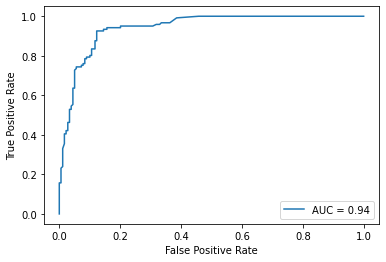

In [25]:
for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])